In [54]:
import gzip
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [24]:
dataset = []

f = gzip.open("steam_games.json.gz")
for l in f:
    d = eval(l)
    dataset.append(d)
        
f.close()

In [25]:
len(dataset)

32135

In [20]:
filtered_dataset = [game for game in dataset if 'sentiment' in game and game['sentiment']]
print(f"Number of records with sentiment: {len(filtered_dataset)}")

Number of records with sentiment: 24953


In [15]:
sentiments = [game['sentiment'] for game in dataset if 'sentiment' in game]
unique_sentiments = set(sentiments)

print("Unique sentiment values:")
print(unique_sentiments)

Unique sentiment values:
{'Overwhelmingly Negative', '9 user reviews', 'Mostly Positive', 'Very Negative', '6 user reviews', 'Mixed', '7 user reviews', 'Negative', 'Mostly Negative', 'Positive', 'Very Positive', '5 user reviews', 'Overwhelmingly Positive', '4 user reviews', '2 user reviews', '8 user reviews', '1 user reviews', '3 user reviews'}


In [ ]:
####################
###### Part 1 ######
####################

In [46]:
# 1.1: Dataset Overview

## data size
print(f"Number of records in the original dataset: {len(dataset)}") # before filtering
filtered_dataset = [game for game in dataset if 'sentiment' in game and game['sentiment']]
print(f"Number of records with sentiment: {len(filtered_dataset)}") # after filtering

## keys
print("Keys in the first record of the filtered dataset:")
print(filtered_dataset[0].keys())

## Feature summary
# Summarize features: Categorical, Numerical, and Date
categorical_features = ['genres', 'tags', 'publisher', 'developer', 'sentiment']
numerical_features = ['price', 'discount_price']
date_feature = 'release_date'

Number of records in the original dataset: 32135
Number of records with sentiment: 24953
Keys in the first record of the filtered dataset:
dict_keys(['publisher', 'genres', 'app_name', 'sentiment', 'title', 'url', 'release_date', 'tags', 'reviews_url', 'specs', 'price', 'early_access', 'id', 'developer'])


Categorized Sentiment Distribution (Ordered):
Overwhelmingly Positive: 303 (1.21%)
Very Positive: 3868 (15.50%)
Mostly Positive: 2744 (11.00%)
Positive: 3281 (13.15%)
Mixed: 4103 (16.44%)
Negative: 123 (0.49%)
Mostly Negative: 802 (3.21%)
Very Negative: 29 (0.12%)
Overwhelmingly Negative: 7 (0.03%)
Not Enough Information: 9693 (38.85%)


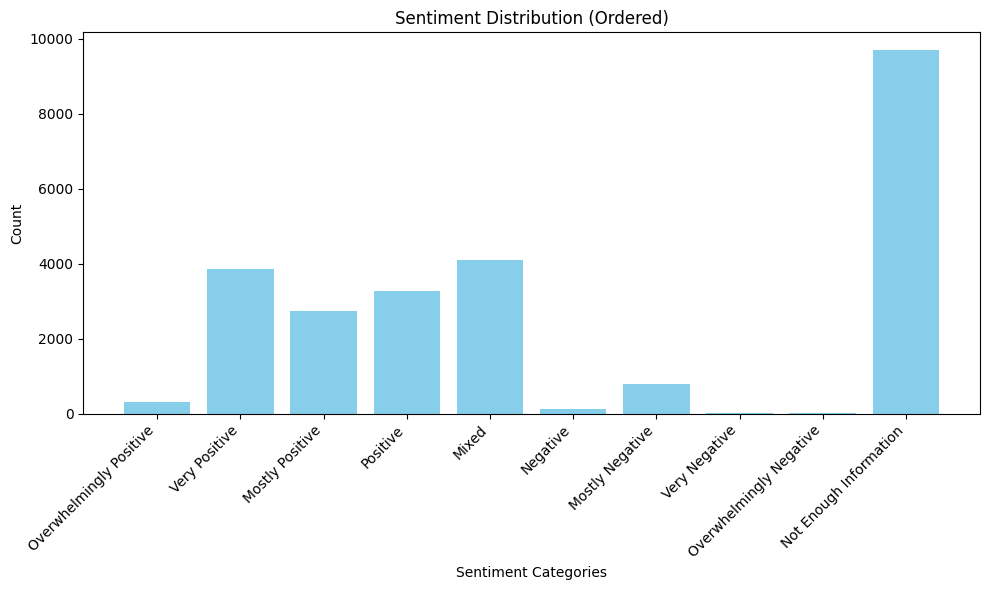

In [62]:
# 1.2: Sentiment Analysis
## filtering sentiments 
def filter_sentiment(sentiment):
    if 'user reviews' in sentiment.lower():
        return 'Not Enough Information'
    return sentiment

filtered_sentiments = [filter_sentiment(game['sentiment']) for game in filtered_dataset]

sentiment_order = [ "Overwhelmingly Positive", "Very Positive", "Mostly Positive", "Positive", "Mixed", 
    "Negative", "Mostly Negative", "Very Negative", "Overwhelmingly Negative", "Not Enough Information"]

sentiment_counts = Counter(filtered_sentiments)
sorted_sentiment_counts = {sentiment: sentiment_counts[sentiment] for sentiment in sentiment_order if sentiment in sentiment_counts}
print("Categorized Sentiment Distribution (Ordered):")
total_records_len = len(filtered_dataset)
for sentiment, count in sorted_sentiment_counts.items():
    print(f"{sentiment}: {count} ({count / total_records_len * 100:.2f}%)")

l1 = list(sorted_sentiment_counts.keys())
v1 = list(sorted_sentiment_counts.values())
plt.figure(figsize=(10, 6))
plt.bar(l1, v1, color='skyblue')
plt.xlabel('Sentiment Categories')
plt.ylabel('Count')
plt.title('Sentiment Distribution (Ordered)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()